<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/math_discrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ
やさしく学べる離散数学  
石村園子

を読む。
&nbsp;


# このノートの読み方
1. colab で開く
1. 上の方のメニューでドライブにコピーを押す
1. セルを実行しながら読む

&nbsp;


目次
1. 集合と論理
1. 関係と写像 => 有向グラフ、関係行列
1. 代数系 => 2項演算、半群と群、環と体
1. 重所集合と束
1. グラフ => ツリー、オイラーグラフ、ハミルトングラフ、有限オートマトン





# 集合

要素または元と言う。

$a \in A$ または $A \owns a$


$a \notin A$ または $A \not \owns a$

メモ $\quad$ latex の `\not \owns` で $\not \owns$ になった。 $\not \in$ は `\not \in`  $\neq$ は `\neq` と $\not =$ `\not =` のどちらでもオッケー。

&nbsp; 

集合は普通 `{}` 波括弧で表す。 latex の中では波括弧は `\` でエスケープしないと消えてしまうので注意。

$A=\{1,2,3,4,5\}$

$A=\{n \ |\  1 \leq n \leq5,\  n は自然数\}$

&nbsp;  

数の集合の表記 $N$ 自然数、$Z$ 整数、$Q$ 有理数、$R$ 実数、$C$ 複素数。

なのだが、$\mathbf {N Z Q R C}$ としないと普通の変数 $A,B,C$ と区別がつかない。 テキストではボールドで斜体になっているが、latex ではむずかしいので `\mathbf` でボールドにすることにする。

&nbsp;


**全体集合** $\quad U$

**空集合** $\quad \emptyset$ $\phi$ $\varnothing \quad$ `\emptyset$ $\phi$ $\varnothing`

集合 $A$ の要素が $B$ の要素であるとき、$A$ は $B$ の部分集合である、と言い、

$A \subseteq B$ または $B \supseteq A$ 

で表す。

$\quad \subseteq \quad$ `\subseteq`

$\quad \supseteq \quad$ `\supseteq`


$A \subseteq B \overset{\text{def}}{\Longleftrightarrow}$ $[x \in A \implies x \in B]$

&nbsp;

集合はある全体集合 $U$ の部分集合として考え、特に $U \subseteq U$ である。

空集合 $\phi$ はすべての集合の部分集合と定めておく。

&nbsp;


**定義** $\quad A \subseteq B \land B \subseteq A$ が成立するとき、$A$ と $B$ は等しいと言い、$A=B$ と書く。

**定義** $\quad A \subseteq B \land A \neq B$ のとき $A$ は $B$ の真部分集合であると言い、 $A \subset B$と書く。

メモ $\quad$ これは別の流儀もあるとのことなので注意して使う。

この本では記号 $A \subseteq B$ を次の意味で使う。

$\quad \quad A \subseteq B \Longleftrightarrow [A \subset B \lor A=B]$

&nbsp;

**数の集合**

$\quad\quad \mathbf N \subset \mathbf Z \subset \mathbf Q \subset \mathbf R \subset \mathbf C$

&nbsp;


定義 $\quad$ 冪集合 べき集合

集合 $A$ のすべての部分集合からなる集合を $A$ の冪集合と言い、 $\mathcal P(A)$ または $2^A$ などで表す。

&nbsp;

例題 2 p.7 

(1) 次の集合の冪集合を集める。

1. $A=\{a,b\}\quad$  #=> $\mathcal P (A) = \{\phi,\{a\},\{b\},\{a,b\}\}$
2. $B=\{\phi\}\quad$ #=> $\mathcal P (B) = \{\phi,\{\phi\}\}$

(2) $A$ の部分集合の中で $\{a\} \subseteq X4 となる集合 $X$ をすべて求める。

=>  $\mathcal P (A)$ の要素の中で $\{a\} \subseteq X$ となる集合は $\{a\},\{a,b\}$

&nbsp;

練習問題 2 p.7 

(1) 次の集合の冪集合を求める。

1. $C=\{a,b,c\}\quad$ #=> $\mathcal P (C) = \{\phi,\{a\},\{b\},\{c\},\{a,b\},\{a,c\},\{b,c\},\{a,b,c\}\}$

2. $D=\{\phi,\{\phi\}\}\quad$ #=> $\mathcal P (D) = \{\phi,\{\phi\},\{\{\phi\}\},\{\phi,\{\phi\}\}\}$

(2) $C$ の部分集合のなkで $\{a\}\subseteq X$ となる集合 $X$ をすべて求める。

=> $\{a\},\{a,b\},\{a,c\},\{a,b,c\}$

In [ ]:
from itertools import *
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

list(powerset(['a','b','c']))

[(),
 ('a',),
 ('b',),
 ('c',),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'c'),
 ('a', 'b', 'c')]

全称記号 $\forall$ と 存在記号 $\exists$ の使い方

$\forall x \in \mathbf Z, \ x \in \mathbf R$ 

日本語訳 $\quad \mathbf Z$ に属するすべての (任意の) 要素 $x$ は $\mathbf R$ に属する。 整数はすべて実数である。

&nbsp;

$\exists x \in \mathbf Q, \ x \in \mathbf Z$

日本語訳 $\quad \mathbf Q$ には $\mathbf Z$ に属する要素 $x$ が存在する。有理数の中には整数であるものが存在する。

&nbsp;

$\forall$ と $\exists$ の順番で意味が変わる。

$\forall x \in \mathbf Z, \ \exists y \in \mathbf Z, \ x+y=1$ 

日本語訳 $\quad \mathbf Z$ の任意の要素 $x$ に対し、$\mathbf Z$ のある要素 $y$ が存在して、$x+y=1$ が成立する。
$\mathbf Z$ の任意の要素 $x$ に対し、$x+y=1$ となるような要素 $y$ が $\mathbf Z$ に存在する。

&nbsp;

$\exists y \in \mathbf R,\ \forall y \in \mathbf R, xy=y$ 

日本語訳 $\quad \mathbf R$
にある要素 $x$ が存在して、$\mathbf R$ の任意の要素 $y$ に対して $xy=y$ が成立する。
$\mathbf R$ の中には、$\mathbf R$ の任意の要素 $y$ に対して $xy=y$ が成立するような要素 $x$ が存在する。 (この $x$ は 1 のことである。)

&nbsp;



例題 3 p.8 日本語訳、論理記号訳を作る。

(1) $\forall x \in \mathbf R, \ x^2 \geq 0 \quad$ 

日本語訳: すべての実数 $x$ の 2乗は 0 以上である。

(2) $\exists x \in \mathbf R, \ x^2+x \leq 0 \quad$ 

日本語訳: $x^2+x \leq 0$ を満たす $x$ が $\mathbf R$ に存在する。

(3) $\forall n \in \mathbf Z,\ \exists m \in \mathbf Z,\ n+m=0 \quad$ 

日本語訳: $\mathbf Z$ の任意の $n$ について、$\mathbf Z$ に $n+m=0$ を満足させる $m$ が存在する。

(4) $\exists a \in \mathbf Z,\ \forall x \in \mathbf R,\ x^2-2x \geq a \quad $ 

日本語訳: すべての実数 $x$ について $x^2-2x \geq a$ が成立する整数 $a$ が存在する。

(5) 複素数の中には、2 乗すると実数になる数が存在する。

論理記号訳: $\exists z \in \mathbf C,\ z^2 \in \mathbf R$

(6) すべての実数 $x$ について、$x^2-2x+2 \geq 0$ が成立する。

論理記号訳: $\forall x \in \mathbf R,\ x^2-2x+2 \geq 0$

(7) 0 と異なる任意の実数 $x$ に対して、$xy=1$ となる実数 $y$ が存在する。

論理記号訳: $\forall x \in \mathbf R^*,\ \exists y \in \mathbf R,\ xy = 1 \quad$ ただし、$\mathbf R^* = \{x \ |\ x \in \mathbf R,\ x \neq 0\}$

(8) 任意の整数 $n$ に対し、 $n+a=n$ となる定数 $a$ が整数の中に存在する。 

論理記号訳: $\forall n \in \mathbf Z,\ \exists a \in \mathbf Z,\ n+a=n$ ($a$ は 0 のこと)

&nbsp;






メモ

$\mathrm R ^* = \mathrm R\backslash \{0\}$

$\mathrm R ^* = \{x \ |\ x \in \mathbf R,\ x \neq 0\}$

練習問題 3 p.9

(1) $\exists n \in \mathbf N,\ \sqrt n \in \mathbf N$

日本語訳: その平方根をとると自然数であるような自然数が存在する。

(2) $\forall x \in \mathbf R^*, \frac1x \in \mathbf R$

日本語訳: 0 を除く任意の実数を分母とし、分子を 1 とする分数は実数である。

(3) $\forall a \in \mathbf R^*,\ \forall x \in \mathbf R,\ \exists x \in \mathbf R,\ ax+b=0$

日本語訳: 実数 $a,b$ ただし $a \neg 0$ について、$ax+b=0$ となる実数 $x$ が存在する。

(4) $\exists a \in \mathbf R,\ \forall x \in \mathbf R,\ |\sin x| \leq a$

日本語訳: 任意の実数 $x$ について $\sin x$ の絶対値が $a$ 以下であるような実数 $a$ が存在する。

(5) 複素数の中には絶対値が 1 となる数が存在する。

論理記号訳: $\exists z \in \mathbf C,\ |z| = 1$

(6)  任意の実数 $a$ に対し、$x^2+x+2 \gt a$ となる有理数 $x$ が存在する。

論理記号訳: $\forall a \in \mathbf R ,\ \exists x \in \mathbf Q ,\ x^2+x+2 \gt a$

&nbsp;


集合の演算

定義

和集合

$A \cup B \overset{\text{def}}{\Longleftrightarrow} \{x \ |\ x \in \lor \ x \in  B\}$

積集合

$A \cap B \overset{\text{def}}{\Longleftrightarrow} \{x \ |\ x \in \land \ x \in  B\}$

補集合

$\overline A \overset{\text{def}}{\Longleftrightarrow} \{x \ |\ x \not \in A \}$

&nbsp;


# ベン図 Venn diagram 

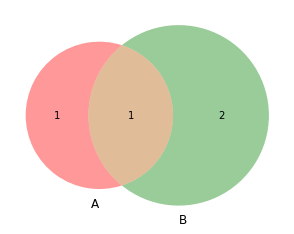

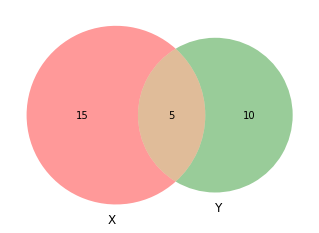

In [2]:
# ベン図 venn diagram
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from sympy import *


A = FiniteSet(1, 2)
B = FiniteSet(2, 3, 4)

venn2(subsets=(A,B))
plt.show()
print()
venn2(subsets=(15,10,5), set_labels=('X','Y'))
plt.show()

定理 1.1

冪等律

$A \cup A = A, \quad A \cap A = A$

交換律

$A \cup B = B\cup A,\quad A\cap B=B\cap A$

結合律

$(A \cup B)\cup C = A \cup (B \cup C)$

$(A \cap B)\cap C = A \cap (B \cap C)$

分配律

$A \cup (B \cap C) = (A \cup B) \cap (A \cup C)$

$A \cap (B \cup C) = (A \cap B) \cup (A \cap C)$

吸収律

$A \cup (A \cap B) = A$

$A \cap (A \cup B) = A$

&nbsp;



定理 1.2 p.11

1. $A \cup \phi = A,\quad A\cap \phi = \phi$
1. $A \cup U = U,\quad A \cap U = A$
1. $A \cup \overline A = U,\quad A \cap \overline A = \phi$
1. $\overline{\overline A} = A$

&nbsp;

定理 1.3 p. 11

ド・モルガンの法則

1. $\overline{A \cup B}= \overline A \cap \overline B$

1. $\overline{A \cap B}= \overline A \cup \overline B$

&nbsp;

例題 4 p.11

次の性質をベン図で確認する。

1. $A \cup (B \cap C) = (A \cup B) \cap (A \cup C)$

1. $\overline{A \cup B}= \overline A \cap \overline B$

&nbsp;

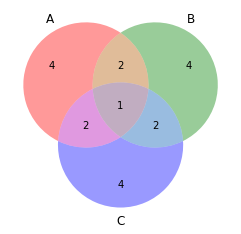

In [13]:
# ベン図 venn diagram
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
venn3(subsets = (4, 4, 2, 4, 2, 2, 1), set_labels = ('A', 'B', 'C'))
plt.show()

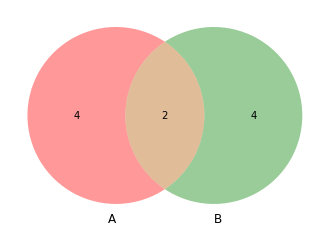

In [14]:
# ベン図 venn diagram
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
venn2(subsets = (4, 4, 2), set_labels = ('A', 'B'))
plt.show()

練習問題 4 p.11 次の性質をベン図で確かめる。
1. $$

# いまここ

# 命題と真理値

真偽が明確に定まる式や文を命題 proposition と言う。

$x+1=2$ のように変数 $x$ が含まれている場合、命題にはならない。 $x$ に要素を代入したときに真理値が定まるものを, $x$ についての述語 predicate あるいは条件 condition と言い、$c(x),p(x)$ などと表す。



**合成命題**

compound proposition

George Bool 1815-1864 イギリスの数学者

**構成規則**

でない、かつ、または、ならば =>  論理結合子 logical connective =>  
$\lnot , \land, \lor, \Rightarrow $

これらの文字や記号が構成規則に従って組合されてできた揮毫列を論理式 formula と言う。

1. 命題を表す文字は論理式である。
1. $p$ と $q$ が論旨式ならば、$(\lnot p), (p \land q), (p \lor q), (p \Rightarrow q), (p \Leftrightarrow q)$ は論理式である。

$r,s$ を命題とするとき、構成規則により、次の論理式が得られる。

$\quad r, (\lnot r), (r \land s), ((\lnot r) \land s), ((r \land s) \lor (\lnot r)), (s \Rightarrow (\lnot r)) $


# sympy の logic

https://docs.sympy.org/latest/modules/logic.html

In [ ]:
from sympy.abc import *
from sympy import *
display( y | (x & y))
display(x | y)
display(~x)

y | (x & y)

x | y

~x

In [ ]:
from sympy.abc import *
from sympy import *
display(x  >> y)
display(Implies(x, y))
display(x << y)
display(Implies(y,x))

Implies(x, y)

Implies(x, y)

Implies(y, x)

Implies(y, x)

In [ ]:
(y & x).subs({x: True, y: True})

True

In [ ]:
(x | y).atoms()

{x, y}

In [ ]:
# SOPform
minterms = [[0, 0, 0, 1], [0, 0, 1, 1],
            [0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 1, 1]]
dontcares = [[0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 1]]
SOPform([w, x, y, z], minterms, dontcares)

(y & z) | (z & ~w)

In [ ]:
# 整数で示すことができる
minterms = [1,3,7,11,15]
dontcares = {0,2,5}
SOPform([w, x, y, z], minterms, dontcares)

(y & z) | (z & ~w)

In [ ]:
# 辞書で示すことができる
minterms = [{w:0,x:1},{y:1,z:1,x:0}]
SOPform([w, x, y, z], minterms)

(x & ~w) | (y & z & ~x)

In [ ]:
# 混ぜて使うこともできる
minterms = [4,7,11,[1,1,1,1]]
dontcares =[{w:0,x:0,y:0},5]
SOPform([w,x,y,z],minterms,dontcares)

(w & y & z) | (x & y & z) | (~w & ~y)

In [ ]:
# POSform
minterms = [[0, 0, 0, 1], [0, 0, 1, 1],
            [0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 1, 1]]
dontcares = [[0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 1]]
POSform([w, x, y, z], minterms, dontcares)

z & (y | ~w)

In [ ]:
# 整数で示すことができる
minterms = [1,3,7,11,15]
dontcares = {0,2,5}
POSform([w, x, y, z], minterms, dontcares)

z & (y | ~w)

In [ ]:
# 辞書で示すことができる
minterms = [{w:0,x:1},{y:1,z:1,x:0}]
POSform([w, x, y, z], minterms)

(x | y) & (x | z) & (~w | ~x)

In [ ]:
# 混ぜて使うこともできる
minterms = [4,7,11,[1,1,1,1]]
dontcares =[{w:0,x:0,y:0},5]
POSform([w,x,y,z],minterms,dontcares)

(w | x) & (y | ~w) & (z | ~y)

In [ ]:
from sympy import sympify, true, false, Or
display(sympify(True))
display((_ is True, _ is true))
display(Or(true,false))
display(_ is true)
display((true >> true, True >> True))

True

(False, False)

True

False

(True, 0)

In [ ]:
display(true.as_set()) #=> U, UniversalSet

UniversalSet

In [ ]:
from sympy import sympify, true, false, Or
display(sympify(False))
display((_ is False, _ is false))
display(Or(true,false))
display(_ is true)
display((~false, ~False))
display((false >> false, False >> False))

False

(False, False)

True

False

(True, -1)

(True, 0)

In [ ]:
false.as_set() #=> EmptySet

EmptySet

In [ ]:
display(x & y)
display(And(x,y).subs(x,1))
display(x | y)
display(Or(x,y).subs(x,0))
display(Not(True))
display(Not(False))
display(And(True,False))
display(Or(True,False))
display(Not(And(And(True,x), Or(x,False))))
display(Not(And(Or(A,B), Or(Not(A), Not(B)))))



x & y

y

x | y

y

False

True

False

True

~x

~((A | B) & (~A | ~B))

In [ ]:
display(~True)
display(~true)

-2

False

In [ ]:
display(Xor(True,False))
display(Xor(True,True))
display(Xor(True,False,True,True,False)) #=> True の数が奇数だと Truelay(Xor(True,False))
display(Xor(True,True))
display(Xor(True,False,True,True,False)) #=> True の数が奇数だと True
display(Xor(True,False,True,False))
display(x ^ y)

True

False

True

False

x ^ y

In [ ]:
Xor(x,y).subs(y,0)

x

In [ ]:
# Nand は頭から評価していって、False があれば即座に True、最後までFalseがなければ False
# その結果、False がひとつでもあれば True, なければ False になる
display(Nand(False,True))
display(Nand(True,True))
display(Nand(x,y))

True

False

~(x & y)

In [ ]:
# Nor は頭から評価していって、True があれば即座に False、最後までTrueなければ True
# その結果、True がひとつでもあれば Fale, なければ True になる
display(Nor(False,True))
display(Nor(True,True))
display(Nor(False,False))
display(Nor(x,y))

False

False

True

~(x | y)

In [ ]:
# Implies は A が True で B が False のときのみ False を返し、それ以外では True である
from sympy.abc import *
from sympy import *
display(Implies(True, False))
display(Implies(False, False))
display(Implies(True, True))
display(Implies(False, True))
display(x >> y)
display(y << x)


False

True

True

True

Implies(x, y)

Implies(x, y)

In [ ]:
display(True >> False)
display(true >> false)


1

False

In [ ]:
# Equivalent は A と B の両方が True または False のときに True
# Equivalent is True iff A and B are both True or both False
from sympy.abc import *
from sympy import *
Equivalent (False, False, False)
Equivalent (True, False, False)
Equivalent (x, And(x, True)) #=> なるほど!!!!

True

In [ ]:
# ITE if then else clause
# A が真なら B の結果、偽なら C の結果を返す
display(ITE(True, False, True))
display(ITE(Or(True,False),And(True,True),Xor(True,True)))
display(ITE(x,y,z))
display(ITE(True, x, y))
display(ITE(False, x, y))
display(ITE(x,y,y))


False

True

ITE(x, y, z)

x

y

y

In [ ]:
# ITE は if then else と言っても引数に bool 値以外はエラー
# display(ITE(True, [],())) #=> TypeError

In [ ]:
# to_cnf(expr, simplify=False, force=False)
# Convert a propositional logical sentence s to 
# conjunctive normal form: ((A | ~B | …) & (B | C | …) & …). 
from sympy.abc import *
from sympy import *
display(to_cnf(~(A|B)|D))
display(to_cnf((A|B)&(A|~A)))
display(to_cnf((A|B)&(A|~A),True))


(D | ~A) & (D | ~B)

(A | B) & (A | ~A)

A | B

In [ ]:
# to_dnf(expr, simplify=False, force=False)
# Convert a propositional logical sentence s to 
# disjunctive normal form: ((A & ~B & …) | (B & C & …) | …).
from sympy.abc import *
from sympy import *
from sympy.abc import C
display(to_dnf(B & (A | C)))
display(to_dnf((A&B)|(A&~B)|(B&C)|(~B&C)))
display(to_dnf((A&B)|(A&~B)|(B&C)|(~B&C),True))

(A & B) | (B & C)

(A & B) | (B & C) | (A & ~B) | (C & ~B)

A | C

In [ ]:
from sympy.abc import *
from sympy import *
from sympy.abc import C
from sympy.logic.boolalg import is_cnf
display(is_cnf(A|B|C))
display(is_cnf(A&B&C))
display(is_cnf((A&B)|C))

True

True

False

In [ ]:
from sympy.abc import *
from sympy import *
from sympy.abc import C
from sympy.logic.boolalg import is_dnf
display(is_dnf(A|B|C))
display(is_dnf(A&B&C))
display(is_dnf((A&B)|C))
display(is_dnf(A&(B|C)))

True

True

True

False

In [ ]:
# simplify_logic(expr,form=None,deep=True,force=False)
from sympy.abc import *
from sympy import *
b=(~x&~y&~z) | (~x&~y& z)
display(b)
display(simplify_logic(b))
display(S(b)) #=> SingletonRegistry
display(simplify_logic(S(b)))

(z & ~x & ~y) | (~x & ~y & ~z)

~x & ~y

(z & ~x & ~y) | (~x & ~y & ~z)

~x & ~y

B & (A | C)

In [ ]:
# bool_map(bool1, bool2)
from sympy.abc import *
from sympy import *
function1 = SOPform([x, z, y],[[1, 0, 1], [0, 0, 1]])
function2 = SOPform([a, b, c],[[1, 0, 1], [1, 0, 0]])
display(bool_map(function1, function2))

(y & ~z, {y: a, z: b})

In [ ]:
eq =  Or(And(Not(y), w), And(Not(y), z), And(x, y))
eq2 = Or(And(Not(c), a), And(Not(c), d), And(b, c))
display(bool_map(eq, eq2))
eq = And(Xor(a, b), c, And(c,d))
display(bool_map(eq, eq.subs(c, x)))

((x & y) | (w & ~y) | (z & ~y), {w: a, x: b, y: c, z: d})

(c & d & (a | b) & (~a | ~b), {a: a, b: b, c: d, d: x})

In [ ]:
# inference, satisfiable
from sympy.abc import *
from sympy import *
display(satisfiable(x & ~x))
display(satisfiable((x|y)&(x|~y)&(~x|y)))
display(satisfiable(x))

False

{x: True, y: True}

{x: True}

In [ ]:
display(satisfiable(True))

{True: True}

In [ ]:
display(next(satisfiable(A & ~A, all_models=True)))
models=satisfiable((A >> B)&B, all_models=True)
display(next(models))
def use_models(models):
    for model in models:
        if model:
            # do something with the model
            print(model)
        else:
            # Given expr is unsatisfiable
            print("UNSAT")
use_models(satisfiable(A>>~A,all_models=True))
use_models(satisfiable(A^A,all_models=True))

False

{A: False, B: True}

{A: False}
UNSAT


# 逆

論理式 $p \Rightarrow q$ において、$p$ を仮定 hypothesis または前提 antecedent, premise 、 $q$ を結論 conclusion, consequent と言う。

仮定と結論を入れ替えた $q \Rightarrow p$ を $p \Rightarrow q$ の逆 converse と言う。

反例 counter example



# 必要十分条件



論理式 $p \Rightarrow q$ が成り立つとき

$q$ を $p$ (が成り立つため) の必要条件 necessary conclusion と言う。

$p$ を $q$ (が成り立つため) の十分条件 sufficient conclusion と言う。


恒真 トートロジー tautology

恒偽 contradiction


# 充足可能性問題 satisfiable problem SAT

ある論理式が真となるための各命題への真理値の割り当て方(組合せ)が少なくとも 1通りあるとき、すなわち恒真でない論理式を充足可能 sastifiable と言う。


# いまここ

# 最後